In [33]:
# 1 Import the necessary libraries.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [35]:
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [36]:
customer_df = pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)


(9134, 24)

In [37]:
# 3 First look at its main features (head, shape, info).

In [38]:
display(customer_df.head())
display(customer_df.shape)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

In [39]:
# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [40]:
customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns))
customer_df.columns = list(map(lambda x: x.replace(" ","_"), customer_df.columns))


In [41]:
# 5 Change effective to date column to datetime format.

In [42]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [43]:
# 6 Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be 
# useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [44]:
customer_df_num = customer_df.select_dtypes(include=[np.number])

In [45]:
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()
def continuous_or_discrete():
    for x in customer_df_num.columns:
        
        if ((customer_df_num[x].nunique())>=7):
            continuous_df[x] = customer_df_num[x]
        else:
            discrete_df[x] = customer_df_num[x]




In [46]:
continuous_or_discrete()

In [47]:
continuous_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879


In [48]:
discrete_df.head()

,number_of_open_complaints
0,0
1,0
2,0
3,0
4,0


In [49]:
# 7 Plot a correlation matrix, comment what you see.

In [50]:
correlations_matrix = customer_df.corr()
customer_df.corr()
# We notice that total_claim_amount is highly correlated with monthly_premium_auto (by 0.63)
# as well as with income (by -0.36).
# Also, there is no multicollinearity between independent variables


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [51]:
# 8 Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to 
# change the plot type to one better suited for continuous data!)

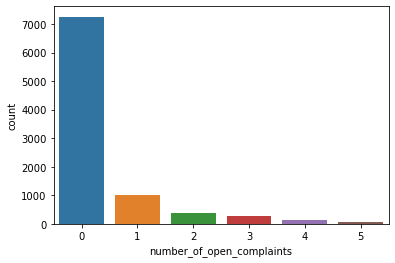

In [52]:
for i in discrete_df.columns:
    sns.countplot(x=discrete_df[i], data = discrete_df)
    plt.show()

In [53]:
#Most people doesn´t complaint.

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


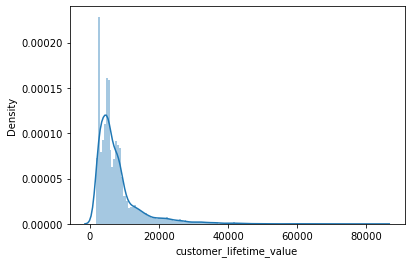

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


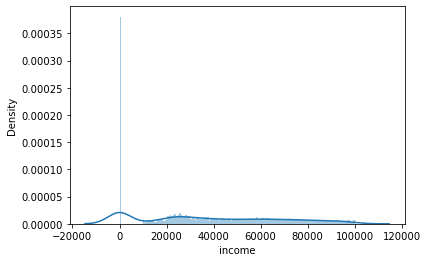

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


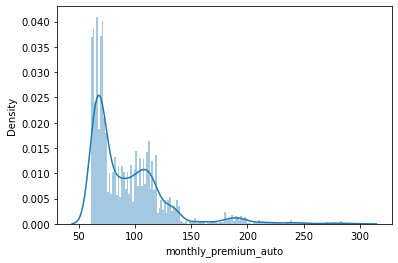

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


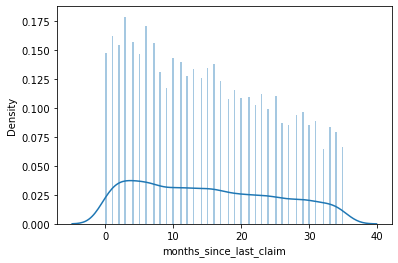

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


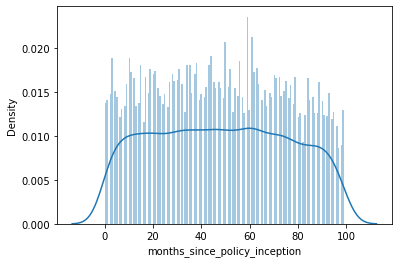

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


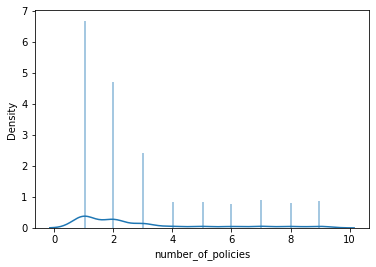

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


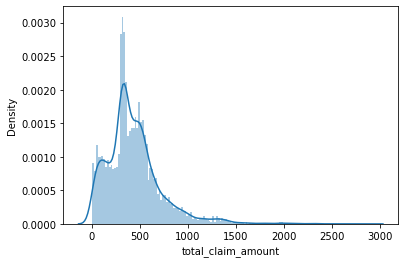

In [54]:
for i in continuous_df.columns:
    sns.distplot(continuous_df[i], bins=150)
    plt.show()

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


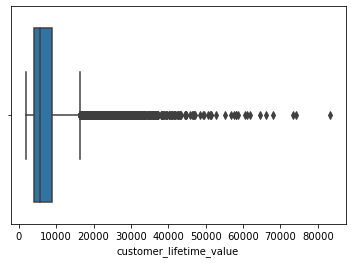

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


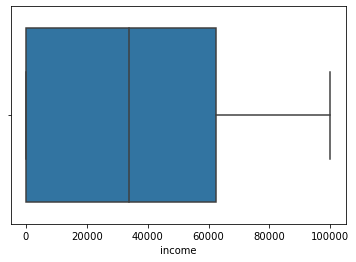

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


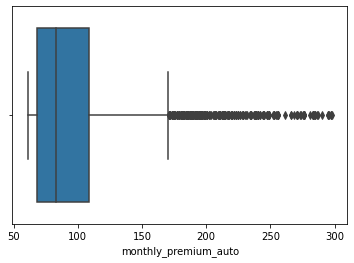

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


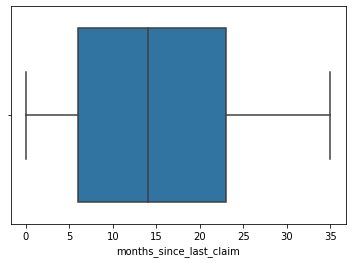

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


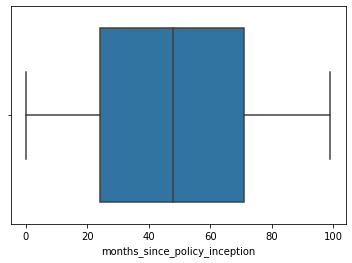

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


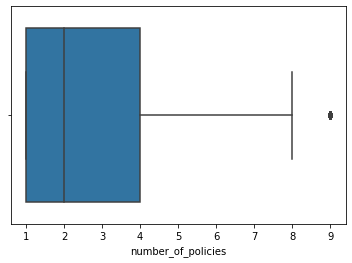

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


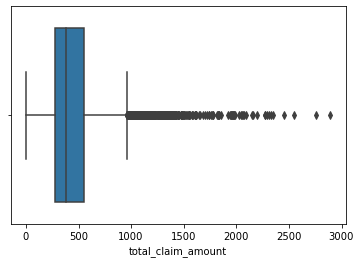

In [55]:
for i in continuous_df.columns:
    sns.boxplot(continuous_df[i])
    plt.show()

In [56]:
# 9 Comment what you can see in the plots.

In [57]:
# We can see that the variables: customer_lifetime_value, monthly_premium_auto and total_claim_amount are heavily skewed.

In [58]:
# 10 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [59]:
# We can see that the variables: customer_lifetime_value, monthly_premium_auto and total_claim_amount are heavily skewed and so 
# contain a lot of outliers as can be ssen in their boxplots.

In [60]:
# 11 Did you find outliers? Comment what you will do with them.

In [61]:

iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed


16414.039911750002


817

In [62]:

iqr = np.nanpercentile(continuous_df['monthly_premium_auto'],75) - np.nanpercentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.nanpercentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed


170.5


430

In [63]:

iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed


960.3997301249999


453

In [64]:
# 12 Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [65]:
# Looking at the outsiders, we would choose to eliminate them and study them separately 
# to obtain more equally distributed data


In [66]:
customer_df_num.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [67]:
# We've checked that there are no NaN values. And we also concluded that the 0 incomes can be quite logical.

# Lab 2

In [68]:
#1. Import the necessary libraries if you are starting a new notebook. 
#Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [69]:
customer_df = pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [71]:
customer_df = pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.columns = list(map(lambda x: x.lower(), customer_df.columns))
customer_df.columns = list(map(lambda x: x.replace(" ","_"), customer_df.columns))

(9134, 24)

In [72]:
#2. Find all of the categorical data. Save it in a categorical_df variable.

In [73]:
categorical_df= customer_df.select_dtypes(include=[object])

In [74]:
#3. Check for NaN values.

In [75]:
categorical_df.isnull().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [76]:
#4. Check all unique values of columns.

In [77]:
for i in categorical_df:
    print(categorical_df[i].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11   

In [78]:
#5. Check dtypes. Do they all make sense as categorical data?

In [79]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [80]:
# All columns except effective_to_date can be considered as categorical

In [81]:
#6. Does any column contain alpha and numeric data? Decide how to clean it.

In [82]:
# policy and renew_offer_type contains alphanumeric values that can be converted to numerical only

In [83]:
def clean_renew_offer_type(x):
    
    if (x  == 'Offer1'):
        return 1
    elif (x  == 'Offer2'):
        return 2
    elif (x  == 'Offer3'):
        return 3
    elif (x  == 'Offer4'):
        return 4

categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(clean_renew_offer_type)

C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/2141147489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(clean_renew_offer_type)


In [84]:
categorical_df['policy'] = categorical_df['policy'].str.replace('(.*)(1)','1', regex=True)
categorical_df['policy'] = categorical_df['policy'].str.replace('(.*)(2)','2', regex=True)
categorical_df['policy'] = categorical_df['policy'].str.replace('(.*)(3)','3', regex=True)

categorical_df['policy'] = pd.to_numeric(categorical_df['policy'])

C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/4032613402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['policy'] = categorical_df['policy'].str.replace('(.*)(1)','1', regex=True)
C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/4032613402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['policy'] = categorical_df['policy'].str.replace('(.*)(2)','2', regex=True)
C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/4032613402.py:3: SettingWithCopyWarning: 
A value is t

In [85]:
categorical_df['renew_offer_type'].value_counts()

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

In [86]:
categorical_df['policy']

0       3
1       3
2       3
3       2
4       1
       ..
9129    1
9130    3
9131    2
9132    2
9133    3
Name: policy, Length: 9134, dtype: int64

In [87]:
#7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [88]:
# We decide to change effective_to_date to date format. 

In [89]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'], errors='coerce')
categorical_df.head()

C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/2206415158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'], errors='coerce')


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


In [90]:
#8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
categorical_df['effective_to_date'] =  np.where(categorical_df['effective_to_date'].dt.month == 1, 1, 2)


C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/3997156653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['effective_to_date'] =  np.where(categorical_df['effective_to_date'].dt.month == 1, 1, 2)


In [91]:
# policy_type is the general discription of the policy. And then policy is a detailed description of the policy_type. 
# For example, a car can be third party or franchised and be a personal or corporate car. 

In [92]:
#9. Check number of unique values in each column, can they be combined in any way to ease encoding?
#Comment your thoughts and make those changes.

In [93]:
# effective_to_date can be organized into: january and february 
# education contains Master and Doctor and be joined into a 'higher_than_bachelor' category  
# employmentstatus contains Medical Leave that can be included in Employed and Disabled and Retired into a 'other' category
# vehicle_class can be organized into: Four-Door Car, Two-Door Car, SUV and Luxury Car

In [94]:
def clean_education(x):
    
    if ((x  == 'Master') | (x  == 'Doctor' )):
        return 'Higher than Bachelor'
    else:
        return x

categorical_df['education'] = categorical_df['education'].apply(clean_education)

C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/1612593991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['education'] = categorical_df['education'].apply(clean_education)


In [95]:
def clean_employmentstatus(x):
    
    if (x  == 'Medical Leave'):
        return 'Employed'
    elif ((x  == 'Disabled') | (x  == 'Retired' )):
        return 'Other'
    else:
        return x
    
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].apply(clean_employmentstatus)

C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/1820625965.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['employmentstatus'] = categorical_df['employmentstatus'].apply(clean_employmentstatus)


In [96]:
def clean_vehicle_class(x):
    
    if ((x  == 'Luxury SUV')| (x  == 'Sports Car' )):
        return 'Luxury Car'
    else:
        return x
    

categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(clean_vehicle_class)

C:\Users\gonza\AppData\Local\Temp/ipykernel_49528/233414622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['vehicle_class'] = categorical_df['vehicle_class'].apply(clean_vehicle_class)
